In [1]:
# for each repo
    # for each bug folder
        # iterate over file with the same name in `before` and `after`
            # compute diff
            # if diff is empty: nothing
            # else:
                # increase the counter of files, hunks, and lines for the bug
                
# iterate over 
        # read before folder
        # read after folder
        

In [2]:
import os
import difflib as dl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
FOLDER_A = "/home/paltenmo/Documents/QUANT-PROG/OOPSLA_21_Artifacts/Bugs-Quantum-Computing-Platforms/artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#567/before/"
FOLDER_B = "/home/paltenmo/Documents/QUANT-PROG/OOPSLA_21_Artifacts/Bugs-Quantum-Computing-Platforms/artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#567/after/"

In [4]:
# for each repo
    # for each bug folder
        # iterate over file with the same name in `before` and `after`
            # compute diff
            # if diff is empty: nothing
            # else:
                # increase the counter of files, hunks, and lines for the bug

                
def read_content(path):
    with open(path, 'r') as in_file:
        return in_file.read()
                
def iterate_over(folder_master, folder_slave): 
    """Iterate over file with the two folders, return the file contents.
    
    Note that only files in common are returned.
    """
    files_in_master = [
        f for f in os.listdir(folder_master)
        if os.path.isfile(os.path.join(folder_master, f))
    ]
    files_in_slave = [
        f for f in os.listdir(folder_slave)
        if os.path.isfile(os.path.join(folder_slave, f))
    ]
    files_in_common = set(files_in_master).intersection(set(files_in_slave))
    results = []
    
    for filename in files_in_common:
        file_master = os.path.join(folder_master, filename)
        file_slave = os.path.join(folder_slave, filename)
        print(file_master)
        print(file_slave)
        content_master = read_content(file_master)
        content_slave = read_content(file_slave)
        item = (filename, content_master, content_slave)
        results.append(item)
        
    return results

In [5]:
#iterate_over(folder_master=FOLDER_A, folder_slave=FOLDER_B)

In [6]:
os.listdir("../artifacts/minimal_commits_v02")

['mitiq',
 'qsharp-runtime',
 'strawberryfields',
 'tequila',
 'pennylane',
 'qiskit-terra',
 'qiskit-aer',
 'rules.md',
 'qsharp-compiler',
 'amazon-braket-sdk-python',
 'dwave-system',
 'qiskit-ignis',
 'OpenQL',
 'ProjectQ',
 'pyquil',
 'QuantumLibraries',
 'qulacs',
 'xacc',
 'Cirq']

In [7]:
def get_line_numbers(line):
    token = line.split(" ")
    numbers_old_file = token[1]
    numbers_new_file = token[2]
    delete_line_number = (
        int(numbers_old_file.split(",")[0].replace("-", "")) - 1
    )
    additions_line_number = int(numbers_new_file.split(",")[0]) - 1
    return delete_line_number, additions_line_number

def get_hunks(text_diff):
    """Extract the hunks form the unified diff."""
    lines = text_diff.split("\n")
    modified_lines = {
        "added": [],
        "deleted": [],
    }  # type: Dict[str, List[Tuple[int, str]]]

    count_deletions = 0
    count_additions = 0

    chunks = []
    
    # there are different section types: 
    # header, unchanged_text, add_section, del_section
    c_section = 'unchanged_text'
    prev_section = 'unchanged_text'
    chunk = {
        "added": [],
        "deleted": [],
    }
    
    for line in lines:
        line = line.rstrip()
        count_deletions += 1
        count_additions += 1

        
        if line.startswith("@@"):
            c_section = 'header'
            count_deletions, count_additions = get_line_numbers(line)
            # initialize a new dictionary for the change hunk
            chunk = {
                "added": [],
                "deleted": [],
            }
            
        elif line.startswith("-"):
            c_section = 'del_section'
            modified_lines["deleted"].append((count_deletions, line[1:]))
            count_additions -= 1
            # append this line as deleted line of this change hunk
            chunk["deleted"].append((count_deletions, line[1:]))

        elif line.startswith("+"):
            c_section = 'add_section'
            modified_lines["added"].append((count_additions, line[1:]))
            count_deletions -= 1
            # append this line as added line of this change hunk
            chunk["added"].append((count_additions, line[1:]))

        elif line == r"\ No newline at end of file":
            count_deletions -= 1
            count_additions -= 1
            
        else:
            c_section = 'unchanged_text'
            # if we came out of a change hunk section we can close this chunk
            # and append it to the chunks list
            if c_section != prev_section and prev_section != 'header':
                chunks.append(chunk)
                chunk = {
                    "added": [],
                    "deleted": [],
                }
        
        prev_section = c_section
        
    # flush the last change (if present)
    if len(chunk['added']) > 0 or len(chunk['deleted']) > 0:
        chunks.append(chunk)

    return chunks

In [8]:
diffs = dl.unified_diff(["ciao", "come"], ["ciao", "come"])
text_diff = "\n".join(list(diffs))
# remove the useless preface before the "@@" character
text_diff = text_diff[text_diff.find("@@"):]
print(name)
print(text_diff)
#print("-" * 80)
#print("HUNKS:")
#print("-" * 80)
hunks = get_hunks(text_diff)
print(hunks)
# count the lines
n_modified_lines = 0
for h_i, hunk in enumerate(hunks):
    print(f"Hunk {h_i}")

NameError: name 'name' is not defined

In [9]:
REPOS_FOLDER = "../artifacts/minimal_commits_v02"

repos = [
    'mitiq',
    'qsharp-runtime',
    'strawberryfields',
    'tequila',
    'pennylane',
    'qiskit-terra',
    'qiskit-aer',
    'qsharp-compiler',
    'amazon-braket-sdk-python',
    'dwave-system',
    'qiskit-ignis',
    'OpenQL',
    'ProjectQ',
    'pyquil',
    'QuantumLibraries',
    'qulacs',
    'xacc',
    'Cirq'
]

reports = []

for reponame in repos:
    
    path_repo = os.path.join(REPOS_FOLDER, reponame)
    repo_bugs = os.listdir(path_repo)    
    
    for bug_folder_name in repo_bugs:      
        
        path_bug_folder = os.path.join(path_repo, bug_folder_name)
        
        folder_before = os.path.join(path_bug_folder, "before")
        folder_after = os.path.join(path_bug_folder, "after")
        
        # read metadata
        path_metadata = os.path.join(path_bug_folder, "metadata.json")
        with open(path_metadata, "r") as metadata_file:
            metadata = json.load(metadata_file)
        
        for name, content_before, content_after in iterate_over(
                folder_master=folder_before, 
                folder_slave=folder_after):
            diffs = dl.unified_diff(
                content_before.splitlines(False), 
                content_after.splitlines(False))
            text_diff = "\n".join(list(diffs))
            # remove the useless preface before the "@@" character
            text_diff = text_diff[text_diff.find("@@"):]
            print(name)
            print(text_diff)
            #print("-" * 80)
            #print("HUNKS:")
            #print("-" * 80)
            hunks = get_hunks(text_diff)
            # count the lines
            n_modified_lines = 0
            for h_i, hunk in enumerate(hunks):
                print(f"Hunk {h_i}")
                print(hunk)
                i_modified_lines = max(len(hunk["deleted"]), len(hunk["added"]))
                n_modified_lines += i_modified_lines
            # if the file has any change, store it
            if len(hunks) > 0:
                report = {
                    "n_lines": n_modified_lines,
                    "n_hunks": len(hunks),
                    "filename": name,
                    "n_files": 1,
                    **metadata
                }
                reports.append(report)

../artifacts/minimal_commits_v02/mitiq/mitiq#125/before/folding.py
../artifacts/minimal_commits_v02/mitiq/mitiq#125/after/folding.py
folding.py
@@ -593,7 +593,7 @@

 
     # Fold remaining gates until the stretch is reached
     ops = list(base_circuit.all_operations())
-    num_to_fold = int(round(fractional_stretch * len(ops)))
+    num_to_fold = int(round(fractional_stretch * len(ops) / 2))
 
     if num_to_fold > 0:
         folded += Circuit([inverse(ops[-num_to_fold:])], [ops[-num_to_fold:]])
Hunk 0
{'added': [(597, '    num_to_fold = int(round(fractional_stretch * len(ops) / 2))')], 'deleted': [(597, '    num_to_fold = int(round(fractional_stretch * len(ops)))')]}
../artifacts/minimal_commits_v02/mitiq/mitiq#425/before/guide-getting-started.rst
../artifacts/minimal_commits_v02/mitiq/mitiq#425/after/guide-getting-started.rst
guide-getting-started.rst
@@ -221,6 +221,8 @@

             optimization_level=0,
             noise_model=noise_model,
             shots=shots,
+          

test_ops_decompositions.py
@@ -275,7 +275,6 @@

         assert np.allclose(ratio, np.ones([n, n]), atol=tol, rtol=0)
 
 
-@pytest.mark.broken('FIXME hbar issue')
 class TestGaussianTransform:
     """Tests for the GaussianTransform quantum operation"""
 
@@ -285,32 +284,20 @@

         S1 = random_symplectic(n)
         S2 = random_symplectic(n)
 
-        G1 = ops.GaussianTransform(S1, hbar=hbar)
-        G1inv = ops.GaussianTransform(np.linalg.inv(S1), hbar=hbar)
-        G2 = ops.GaussianTransform(S2, hbar=hbar)
+        G1 = ops.GaussianTransform(S1)
+        G1inv = ops.GaussianTransform(np.linalg.inv(S1))
+        G2 = ops.GaussianTransform(S2)
 
         # a symplectic merged with its inverse is identity
         assert G1.merge(G1inv) is None
 
         # two merged symplectics are the same as their product
         assert np.allclose(G1.merge(G2).p[0].x, S2 @ S1, atol=tol, rtol=0)
-    def test_setting_hbar(self, hbar):
-        prog = sf.Program(3, hbar=hbar)
-        S1 = r

noise_model.py
@@ -424,7 +424,7 @@

             qs_str = self._qubits2str(qubits)
             nqs_str = self._qubits2str(noise_qubits)
             if qs_str in gate_qubit_dict:
-                noise_qubit_dict = gate_qubit_dict[nqs_str]
+                noise_qubit_dict = gate_qubit_dict[qs_str]
                 if nqs_str in noise_qubit_dict:
                     new_error = noise_qubit_dict[nqs_str].compose(error)
                     noise_qubit_dict[nqs_str] = new_error
Hunk 0
{'added': [(428, '                noise_qubit_dict = gate_qubit_dict[qs_str]')], 'deleted': [(428, '                noise_qubit_dict = gate_qubit_dict[nqs_str]')]}
../artifacts/minimal_commits_v02/qiskit-aer/qiskit-aer#1278/before/state_chunk.hpp
../artifacts/minimal_commits_v02/qiskit-aer/qiskit-aer#1278/after/state_chunk.hpp
../artifacts/minimal_commits_v02/qiskit-aer/qiskit-aer#1278/before/statevector_state_chunk.hpp
../artifacts/minimal_commits_v02/qiskit-aer/qiskit-aer#1278/after/statevector_state_ch

../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#240/before/qiskit>ignis>mitigation>measurement>fitters.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#240/after/qiskit>ignis>mitigation>measurement>fitters.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#240/before/qiskit>ignis>verification>randomized_benchmarking>fitters.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#240/after/qiskit>ignis>verification>randomized_benchmarking>fitters.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#240/before/circuits.py
../artifacts/minimal_commits_v02/qiskit-ignis/qiskit-ignis#240/after/circuits.py
qiskit>ignis>mitigation>measurement>fitters.py
@@ -43,6 +43,8 @@

         Initialize a measurement calibration matrix from the results of running
         the circuits returned by `measurement_calibration_circuits`
 
+        A wrapper for the tensored fitter
+
         Args:
             results: the results of running the measurement cali

In [10]:

df_reports = pd.DataFrame.from_records(reports)

In [11]:
df_reports.head()

,n_lines,n_hunks,filename,n_files,commit_hash,commit_msg,project_name,id,human_id,author_comment
0,1,1,folding.py,1,5fc12d5e4688ba4006eb4a733379b61c0e9c2b45,fix factor of 2. fix test. fix docs gobal_fold...,mitiq,1687,mitiq#125,The bug is in the unitary folding procedure wh...
1,4,2,guide-getting-started.rst,1,03e0d069752a1c92027b5988428ad08249bdd68b,Seed Qiskit simulator to fix non-deterministic...,mitiq,1697,mitiq#425,"In the demo in the getting started guide, ther..."
2,2,2,folding.py,1,4d260bd6545c20f3b1fefc2c843fb67d1296cb45,Fix folding by fidelity for scale factors larg...,mitiq,1702,mitiq#525,"Reporter: ""Folding with fidelities={""single"": ..."
3,4,4,folding_pyquil.py,1,1d9640d6be47cd575034e243cfa12e8668cfc9ad,Fixes bug with small stretches (#30)\n\n* Fixe...,mitiq,1685,mitiq#30,Fix the number of folding for the unitary fold...
4,6,3,folding_cirq.py,1,1d9640d6be47cd575034e243cfa12e8668cfc9ad,Fixes bug with small stretches (#30)\n\n* Fixe...,mitiq,1685,mitiq#30,Fix the number of folding for the unitary fold...


In [12]:
df_grouped = df_reports.groupby(by=["human_id", "id", "project_name", "commit_hash"]).sum().reset_index()
df_grouped["comprehensive_id"] = df_grouped.apply(
    lambda row: f'{row["human_id"]} ({row["id"]})',
    axis=1
)

In [13]:
df_grouped.head(20)

,human_id,id,project_name,commit_hash,n_lines,n_hunks,n_files,comprehensive_id
0,Cirq#1345,1372,Cirq,94181e2784bf9a7b4259503db8a4f6808325bcf2,12,1,1,Cirq#1345 (1372)
1,Cirq#2065,1417,Cirq,a3ab283cecf50c9e74e6f5a586e07f63e55cac8a,3,2,1,Cirq#2065 (1417)
2,Cirq#2739,1464,Cirq,4dae9b2c766fb9cd5a24bce655020b63c0ed47ac,8,2,1,Cirq#2739 (1464)
3,Cirq#2758,1467,Cirq,875132cf97190c016023c20958f69a675376a160,4,4,1,Cirq#2758 (1467)
4,Cirq#3125,1496,Cirq,df52d1c6168d2f64cef4045b1c4a149c98e807d3,18,3,3,Cirq#3125 (1496)
5,Cirq#3381,1518,Cirq,7c8c959e5e4b90f857cd1539279c51d30224033c,27,5,3,Cirq#3381 (1518)
6,Cirq#3497,1537,Cirq,00f29904c6de484c6bd273fdca47bc80a0f84eba,1,1,1,Cirq#3497 (1537)
7,Cirq#3710,1555,Cirq,18c97b3fc3f776a830b25871aabc2b6b1255b301,1,1,1,Cirq#3710 (1555)
8,Cirq#3948,1571,Cirq,51dc09663cc862b7a964aaab2c59952737a44b7b,25,4,1,Cirq#3948 (1571)
9,Cirq#4288,1612,Cirq,504bdbb9bb30249d85ecf7ba199b047150ee33f3,12,3,1,Cirq#4288 (1612)


100
40


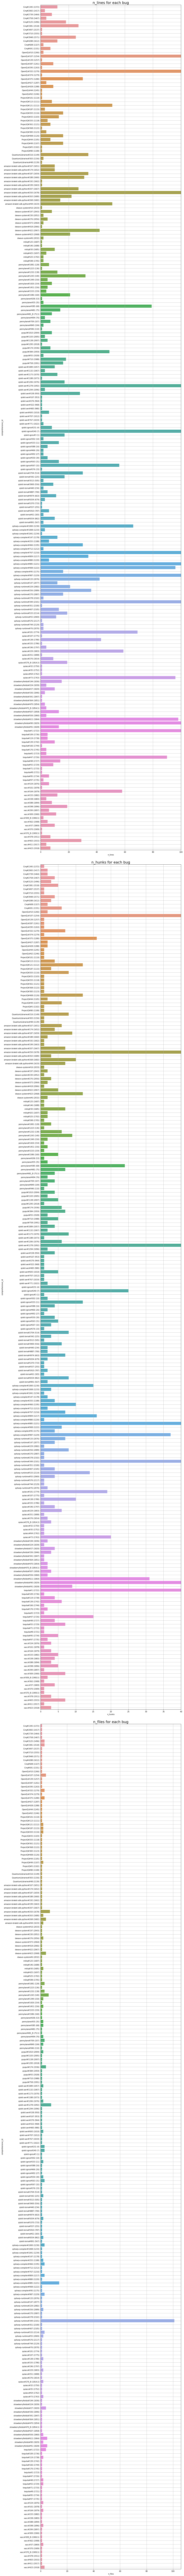

In [14]:
def plot_bug_level_summary(df):
    """Plot the summary for both id and human id of the relevent stats."""
    
    stats_shown = ["n_lines", "n_hunks", "n_files"]
    cap_at = [100, 40, None]
    n_stats_shown = len(stats_shown)
    
    n_bugs = len(df)
    height = (.3 * n_bugs) * n_stats_shown
    
    fig, axes = plt.subplots(n_stats_shown, 1, figsize=(13, height))
    plt.tight_layout(pad=6)
    for stat_i, stat_name in enumerate(stats_shown):   
        ax_stat = axes[stat_i]
        # Number of lines
        sns.barplot(
            data=df,
            y="comprehensive_id",
            x=stat_name,
            ax = ax_stat
        ) 
        ax_stat.set_title(f"{stat_name} for each bug", fontsize=20)
        if cap_at[stat_i] is not None:
            print(cap_at[stat_i])
            ax_stat.set_xlim(0, cap_at[stat_i])
        
        ax_stat.grid()
    
plot_bug_level_summary(df=df_grouped)

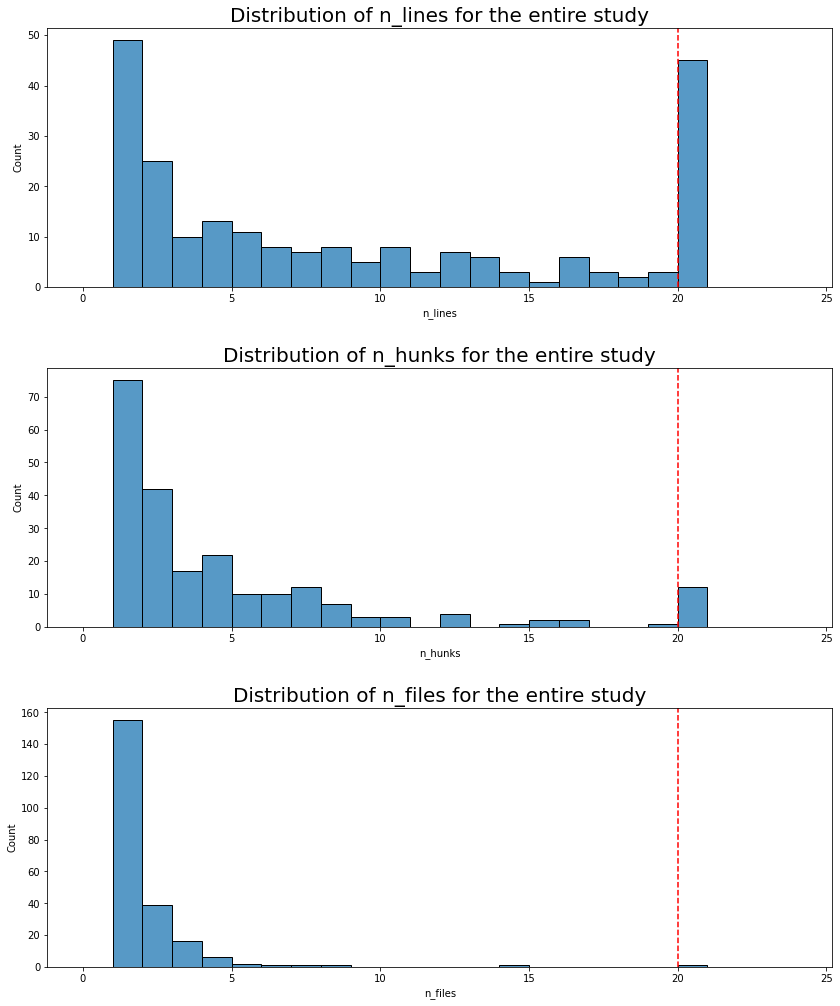

In [15]:
from copy import deepcopy

def plot_study_summary(df):
    """Plot the summary for both id and human id of the relevent stats."""
    df = deepcopy(df)
    stats_shown = ["n_lines", "n_hunks", "n_files"]
    cap_at = [20, 20, 20]
    n_stats_shown = len(stats_shown)
    
    n_bugs = len(df)
    
    fig, axes = plt.subplots(n_stats_shown, 1, figsize=(13, 15))
    plt.tight_layout(pad=6)
    for stat_i, stat_name in enumerate(stats_shown):   
        ax_stat = axes[stat_i]
        
        if cap_at[stat_i] is not None:
            df[stat_name] = df[stat_name].apply(
                lambda e: e if e < cap_at[stat_i] else cap_at[stat_i] 
            )
        
        # Number of lines
        sns.histplot(
            data=df,
            x=stat_name,
            bins=range(cap_at[stat_i] + 5) if cap_at[stat_i] is not None else range(20),
            ax = ax_stat
        )  
        if cap_at[stat_i] is not None:
            ax_stat.axvline(x=cap_at[stat_i], c="r", linestyle="--")
        ax_stat.set_title(f"Distribution of {stat_name} for the entire study", fontsize=20)
plot_study_summary(df_grouped)